# Instalación y entrega

**Los datos necesarios para realizar la práctica están en una carpeta compartida que se llama `data`, situada en "Shared with me". Para que el cuaderno pueda acceder a ella es necesario crear un link en "My Drive". El link se crea simplemente seleccionando "data", y desde el menu del botón derecho seleccione "Add a shortcut to Drive".**

**Una vez hecho esto, ejecute la siguiente celda. Esta celda montará el directorio de trabajo del cuaderno y verá la carpeta `data` a través del link. Para montar el directorio le pedirá que se registre en "Drive"**.

**Cuando termine la práctica, rellenando las celdas de código y respondiendo a las preguntas, descárguelo a su máquina. Para bajar el cuaderno hay que ir a "Archivo --> Descargar --> Descargar .ipynb". Una vez descargado lo tenéis que subir a la actividad en formato ".ipynb".**


In [ ]:
## Instalación: esta celda monta el directorio de trabajo
if 'google.colab' in str(get_ipython()):
    # Setup colab
    from google.colab import drive
    drive.mount('/drive')
    %cd /drive/My Drive/data
else:
    pass

Mounted at /drive
/drive/.shortcut-targets-by-id/1MHsiAeNCqIWHIkKgK7ggxOaSkemKqWSb/data


Linea añadida para saber la GPU asignada

In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-06cfd874-ac3e-21af-f032-cf3ff82eb7ea)


# Entrenamiento

En esta práctica analizaremos el proceso de entrenamiento de una red neuronal. En primer lugar estudiamos el efecto de la tasa de aprendizaje y el tamaño del lote (batch) en el proceso de optimización. Posteriormente analizamos las gráficas de aprendizaje para detectar los dos problemas típicos del entrenamiento: el **sobreajuste** y el **infra-ajuste**. Finalmente configuramos el proceso de parada temprana para evitar el sobreajuste de la red. 

Las dos siguientes celdas configuran los directorios de trabajo y las librerías necesarias.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.callbacks import EarlyStopping
# setup libraries
import numpy as np
import pandas as pd
from data_m3.utils.dltools import animate_sgd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GroupShuffleSplit
# Setup plotting
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

En esta práctica aprenderemos a entrenar una red neuronal con el conjunto de datos *Fuel Economy*. El objetivo consiste en diseñar un modelo que sea capaz de predecir el consumo de combustible de un automóvil teniendo en cuenta diferentes características, como son su tipo de motor o el año de fabricación. Como se podrá observar, hay características que no son numéricas y habrá que realizar un preprocesado para poder codificarlas de forma numérica. En primer lugar, ejecute la siguiente celda.

In [ ]:
fuel = pd.read_csv('data_m3/datasets/fuel.csv')

# Separa la variable objetivo respecto del resto, que son las características.
X = fuel.copy()
# Remove target
y = X.pop('FE')

# Etapa de preprocesado, para codificar los datos y normalizarlos
preprocessor = make_column_transformer(
    (StandardScaler(),
     make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(sparse=False),
     make_column_selector(dtype_include=object)),
)

X = preprocessor.fit_transform(X)
y = np.log(y) # log transform target instead of standardizing

input_shape = [X.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [50]


Analice detenidamente los datos, descomentando las líneas adecuadas en la siguiente celda y comparando las dos situaciones, con preprocesado y sin él. Nuestra variable objetivo es la columna `FE`, que es la que determina el consumo, y el resto de columnas son las características. 

In [ ]:
# EJERCICIO 1 --------- TO DO
# Efecto del preprocesado
# Uncomment to see original data
fuel.head()
# Uncomment to see processed features
#pd.DataFrame(X).head()

,EngDispl,NumCyl,Transmission,FE,AirAspirationMethod,NumGears,TransLockup,TransCreeperGear,DriveDesc,IntakeValvePerCyl,ExhaustValvesPerCyl,CarlineClassDesc,VarValveTiming,VarValveLift
0,4.7,8,AM6,28.0198,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
1,4.7,8,M6,25.6094,NaturallyAspirated,6,1,0,TwoWheelDriveRear,2,2,2Seaters,1,0
2,4.2,8,M6,26.8000,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
3,4.2,8,AM6,25.0451,NaturallyAspirated,6,1,0,AllWheelDrive,2,2,2Seaters,1,0
4,5.2,10,AM6,24.8000,NaturallyAspirated,6,0,0,AllWheelDrive,2,2,2Seaters,1,0


Ejecute la siguiente celda para definir la red que usaremos en esta tarea.

In [ ]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(64, activation='relu'),
    layers.Dense(1),
])

Antes de entrenar la red necesitamos definir la función de pérdidas y el optimizador que usaremos. Usando el método `compile` del modelo, añada el optimizador `Adam` y la función de pérdidas `MAE`.

In [ ]:
# EJERCICIO 2 --------- TO DO
model.compile(
    optimizer="adam",
    loss="mae",
)

Una vez que haya definido el modelo y lo haya compilado con la función de pérdidas y el optimizador, podemos comenzar el entrenamiento. Configure la siguiente celda para entrenar la red durante 200 épocas con un tamaño de lote de 128. 

<blockquote style="margin-right:auto; margin-left:auto; background-color: #ebf9ff; padding: 1em; margin:24px;">
    <strong>Nota:</strong><br>
    
En este caso tenemos tan pocos datos que usaremos todos los datos para el entrenamiento, no tenemos conjunto de validación. Los datos de entrada son `X` y la variable objetivo es `y`.
</blockquote>

In [ ]:
# EJERCICIO 3 --------- TO DO
out = model.fit(
    X, y,
    validation_data=(X, y),
    batch_size=512,
    epochs=300,
)

Epoch 1/300
3/3 [==============================] - 3s 73ms/step - loss: 3.8156 - val_loss: 3.4988
Epoch 2/300
3/3 [==============================] - 0s 14ms/step - loss: 3.4192 - val_loss: 3.1093
Epoch 3/300
3/3 [==============================] - 0s 14ms/step - loss: 3.0303 - val_loss: 2.7193
Epoch 4/300
3/3 [==============================] - 0s 15ms/step - loss: 2.6370 - val_loss: 2.3158
Epoch 5/300
3/3 [==============================] - 0s 15ms/step - loss: 2.2305 - val_loss: 1.8891
Epoch 6/300
3/3 [==============================] - 0s 14ms/step - loss: 1.7994 - val_loss: 1.4617
Epoch 7/300
3/3 [==============================] - 0s 17ms/step - loss: 1.3793 - val_loss: 1.0695
Epoch 8/300
3/3 [==============================] - 0s 14ms/step - loss: 1.0028 - val_loss: 0.7440
Epoch 9/300
3/3 [==============================] - 0s 14ms/step - loss: 0.6905 - val_loss: 0.5331
Epoch 10/300
3/3 [==============================] - 0s 22ms/step - loss: 0.5242 - val_loss: 0.5588
Epoch 11/300
3/3 [=

El último paso es observar las curvas de pérdidas y evaluar el entrenamiento. Ejecute la celda de abajo para obtener la gráfica de pérdidas.

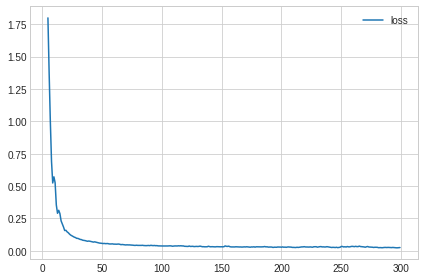

In [ ]:
######## Gráfica de pérdidas
history_df = pd.DataFrame(out.history)
# Start the plot at epoch 5. You can change this to get a different view.
history_df.loc[5:, ['loss']].plot();

## Efecto de la tasa de aprendizaje y tamaño del batch

El uso adecuado de la tasa de aprendizaje y el tamaño del lote permite cierto control sobre los siguientes aspectos:
- El tiempo que se tarda en entrenar un modelo
- El nivel de ruido de las curvas de aprendizaje
- El valor mínimo de la función de pérdidas

Para entender mejor estos dos parámetros volvemos al modelo lineal, la red neuronal de una sola neurona con una sola entrada. Al tener un solo peso y un offset (sesgo) es más fácil ver el efecto de estos parámetros. La siguiente celda generará una animación como la del tutorial. Cambie los valores de "tasa de aprendizaje", "tamaño del lote" y "número de muestras" (el número de ejemplos considerado en la base de datos) y ejecute la celda. Pruebe las siguientes combinaciones, además de las que desee:

| `Tasa de aprendizaje` | `Tamaño del lote` | `Número de ejemplos` |
|-----------------|--------------|----------------|
| 0.05 | 32 | 256 |
| 0.05 | 2 | 256 |
| 0.05 | 128 | 256 |
| 0.02 | 32 | 256 |
| 0.2 | 32 | 256 |
| 1.0 | 32 | 256 |
| 0.9 | 4096 | 8192 |
| 0.99 | 4096 | 8192 |


In [ ]:
# EJERCICIO 4 --------- TO DO
# Pruebe con diferentes valores de la velocidad de aprendizaje, tamaño del batch y número de ejemplos considerados
learning_rate = .2
batch_size = 32
num_examples = 256

animate_sgd(
    learning_rate=learning_rate,
    batch_size=batch_size,
    num_examples=num_examples,
    # You can also change these, if you like
    steps=50, # total training steps (batches seen)
    true_w=3.0, # the slope of the data
    true_b=2.0, # the bias of the data
)

# Capacidad de generalización

En esta sección aprenderemos cómo mejorar el entrenamiento mejorando la capacidad de generalización de la red. En primer lugar cargamos el conjunto de datos *Spotify*, que contiene las características más interesantes de las canciones que suenan en la plataforma. Nuestra tarea será predecir la "popularidad" de una canción basándonos en varias características del audio, como el "tempo", la "bailabilidad", el "modo"...

In [ ]:
spotify = pd.read_csv('data_m3/datasets/spotify.csv')

X = spotify.copy().dropna()
y = X.pop('track_popularity')
artists = X['track_artist']

features_num = ['danceability', 'energy', 'key', 'loudness', 'mode',
                'speechiness', 'acousticness', 'instrumentalness',
                'liveness', 'valence', 'tempo', 'duration_ms']
features_cat = ['playlist_genre']

preprocessor = make_column_transformer(
    (StandardScaler(), features_num),
    (OneHotEncoder(), features_cat),
)

# We'll do a "grouped" split to keep all of an artist's songs in one
# split or the other. This is to help prevent signal leakage.
def group_split(X, y, group, train_size=0.75):
    splitter = GroupShuffleSplit(train_size=train_size)
    train, test = next(splitter.split(X, y, groups=group))
    return (X.iloc[train], X.iloc[test], y.iloc[train], y.iloc[test])

X_train, X_valid, y_train, y_valid = group_split(X, y, artists)

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)
y_train = y_train / 100 # popularity is on a scale 0-100, so this rescales to 0-1.
y_valid = y_valid / 100

input_shape = [X_train.shape[1]]
print("Input shape: {}".format(input_shape))
pd.DataFrame(X_train).head()

Input shape: [18]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.502457,0.645953,1.558164,0.593419,0.873377,-0.686513,-0.467473,-0.357154,1.102182,0.793103,-0.779513,-1.060586,0.0,0.0,1.0,0.0,0.0,0.0
1,0.153292,1.283806,-1.210566,1.105659,-1.144981,-0.323421,-0.435864,-0.375942,-0.518393,0.448972,0.108453,-0.826197,0.0,0.0,1.0,0.0,0.0,0.0
2,0.447686,1.278307,0.450672,0.990346,0.873377,-0.049871,-0.664802,-0.376004,0.098344,-0.996374,0.032646,-0.952004,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.017868,0.744931,-1.210566,0.692401,0.873377,-0.700289,-0.431800,-0.376047,-0.693573,0.930755,0.107271,-0.618229,0.0,0.0,1.0,0.0,0.0,0.0
4,-1.393991,0.871401,-0.103074,0.653741,-1.144981,-0.440516,0.050011,-0.376047,-0.085365,-1.534078,-0.311221,-0.641257,0.0,0.0,1.0,0.0,0.0,0.0


Comenzamos por la red más sencilla, un modelo lineal, el cual tiene poca capacidad de ajuste. Ejecute la siguiente celda para entrenar un modelo lineal, con una sola neurona.

In [ ]:
# red de una sola neurona
model = keras.Sequential([
    layers.Dense(1, input_shape=input_shape),
])
model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50,
    verbose=0, # suppress output since we'll plot the curves
)

## Evaluación de las gráficas de aprendizaje

En la siguiente celda representamos la gráfica de pérdidas:

Minimum Validation Loss: 0.1952


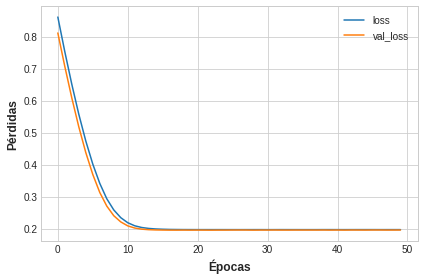

In [ ]:
history_df = pd.DataFrame(history.history)
ax = history_df.loc[0:, ['loss', 'val_loss']].plot()
ax.set(xlabel='Épocas', ylabel='Pérdidas')
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

Es bastante típico que las curvas sigan un patrón de "palo de hockey" como el de la figura anterior. Esto hace que la parte final del entrenamiento sea difícil de analizar. Para evitar los valores altos de la parte inicial de la gráfica, vamos a representar a partir de la época 10:

Minimum Validation Loss: 0.1952


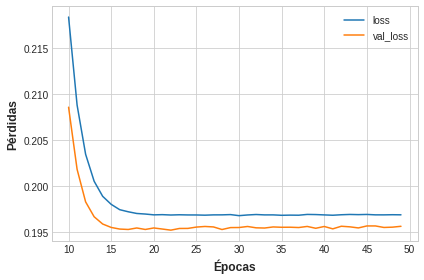

In [ ]:
################# Modelo lineal
# Start the plot at epoch 10
ax = history_df.loc[10:, ['loss', 'val_loss']].plot()
ax.set(xlabel='Épocas', ylabel='Pérdidas')
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

Ahora vamos a añadir algo de capacidad de ajuste a nuestra red. Añadiremos una capa oculta con 128 unidades y otra con 64, ambas con activación `ReLu`. Complete la siguiente celda y ejecútela para entrenar la red y ver las curvas de aprendizaje.

Minimum Validation Loss: 0.2058


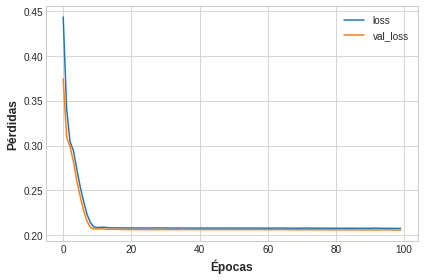

In [ ]:
# EJERCICIO 5 --------- TO DO
############# Modelo de "alta capacidad"
model = keras.Sequential([
    layers.Dense(1, activation='relu',  input_shape=input_shape),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])
model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=4096,
    epochs=100,
    verbose=0, # suppress output since we'll plot the curves
)
history_df = pd.DataFrame(history.history)
ax = history_df.loc[:, ['loss', 'val_loss']].plot()
ax.set(xlabel='Épocas', ylabel='Pérdidas')
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

## Parada temprana

Ahora vamos a definir el `callback` de parada temprana, el cual espera 5 épocas (`patience`) para un cambio en las pérdidas de validación de al menos `0.001` (`min_delta`). Cuando esto se produce, recupera los pesos con la mejor pérdida (`restore_best_weights`).

In [ ]:
# EJERCICIO 6 --------- TO DO
early_stopping = EarlyStopping(
    min_delta=0.001,   # Minimo numero de cambios para considerarlo como mejora
    patience=50,      # Numero de epocas hasta la detención
    restore_best_weights=True,
)

Ahora ejecute la siguiente celda para entrenar el modelo y obtener las curvas de aprendizaje. Observe el argumento `callbacks` en `model.fit`.

Minimum Validation Loss: 0.1950


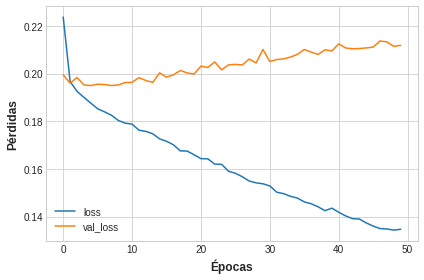

In [ ]:
# Parada temprana
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(128, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(1)
])
model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50,
    callbacks=[early_stopping],
    verbose=0, # suppress output since we'll plot the curves
)
history_df = pd.DataFrame(history.history)
ax = history_df.loc[:, ['loss', 'val_loss']].plot()
ax.set(xlabel='Épocas', ylabel='Pérdidas')
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

# Preguntas

**La adquisición de las competencias asociadas a las prácticas requieren una explicación propia y rigurosa. Las copias y traducciones literales no demuestran la adquisición de las competencias, por tanto no se considerarán válidas (consultar la rúbrica).**

%%%% TO DO %%%%%

<div class="alert alert-success">
1. ¿Que es el SGD?, ¿por qué es interesante trabajar con lotes de datos (batches)?, En el contexto del entrenamiento: ¿qué es una época? 
</div>


**¿Que es SGD?**

SGD es un proceso iterativo que se efectuará sobre la red mientras las pérdidas decrezcan. Este proceso lo que busca precisamente es minimizar las pérdidas de nuestro modelo durante su entrenamiento, para que tras completarlo sea capaz de trabajar correctamente con nuevas bases de datos nunca antes vistas. 

Para ello, emplea la herramienta matemática de optimización "stochastic gradient descent" o SGD. Esta herramienta  consiste en variar el gradiente actual obtenido del estudio de todos los datos, sustitoyendolo por una estimación obtenida a partir de un subconjunto de los datos.

Pasos del proceso:
1.   Evalua un subconjunto de los datos de entrenamiento pasandolo por la red neuronal. La primera vez generará unas predicciones para ese subconjunto y así tener datos desde los que partir.
2.   Se miden las pérdidas dadas evaluando las salidas de la red con respecto a los valores objetivo de la misma.
3. Tras esto, se modifican los pesos en función de hacia donde haya menores pérdidas. Esta direccion se obtiene gracias al gradiente usado por SGD.


**¿Por qué interresa trabajar con lotes de datos (batches)?**

Como se ha explicado en la pregunta anterior, el proceso interativo se realiza sobre un subconjunto de la base de datos sobre la que trabajamos. La idea de esto es poder recorres poco a poco la base da datos, de forma que con cada "batch" se reajusten los pesos "w" y "b". 

Esto da como resultado un mayor número de reajustes, por lo que el modelo podrá reducir mejor sus pérdidas.

No obstante, el valor del "batch" no debe escogerse arbitrariamente, ya que un valor demasiado grande o pequeño va a desembocar en que nuestro modelo no se entrene correctamente. Lo que da como consecuencia un mal entrenamiento y por tanto una mala capacidad de generealización en nuestra solución.

**¿Qué es una época?**

Al dividir nuestra base de datos en subconjuntos de tamaño "batch", con cada iteración no evaluamos toda la base de datos, sino dicho subconjunto.

Es por esto que, tras haber realizado las iteraciones necesarias hasta haber usado todos los datos de la base de datos, decimos que hemos terminado una época. Por lo que, de forma coloquial, una época se puede entender como una "vuelta" completa a nuestra a base de datos.

<div class="alert alert-success">
2. En la celda "# Análisis del SGD". ¿Por qué cree que al final de la gráfica se observa un comportamiento "ruidoso"?
</div>

%%%% TO DO %%%%%

Debido a que el método SGD no trabaja con la base de datos entera a la vez, sino que considera un conjutno de datos (batch) en cada iteración,el desplazamiento del aprendizaje puede presentar un comportamiento ruidoso.
Este ruido se debe a que el resultado obtenido por el gradiente se obtiene en desplazamientos aleatorios, aunque también puede ayudar a aumentar el ruido el sufrir un sobre ajuste durante el entrenamiento.

Como el ruido es aleatorio, toda la información que la red extraiga de él será errónea. El motivo de esto es que si aprende a base de comportamientos aleatorios obtenidos a partir de una base de datos concreta, si pasamos por el modelo otra base de datos diferente su resultado será impredecible y por tanto inútil.

En base a esto, puede ser interesante estudiar y detectar el ruido de nuestro entrenamiento para evitar, por ejemplo, minimos locales de la función.



<div class="alert alert-success">
3. A la vista de la celda denominada "# Gráfica de pérdidas", si entrenas el modelo con más épocas: ¿esperas que la función de pérdidas disminuya más? ¿Por qué?
    
Nota: puedes verificarlo!!
</div>

%%%% TO DO %%%%% 

El número de épocas mide el número de iteraciones que vamos a hacer sobre nuestra base de datos durante el proceso de entrenamiento. Estas vueltas se darán en saltos de tamaño "batch", por lo que el mísmo número de épocas va a presentar variacones del peso "w" diferentes en función del valor que tome "batch". 

Por ejemplo, con números muy bajitos, si mi base de datos tiene 10 valores, y mis saltos son de dos en dos, voy a dar un total de 5 iteraciones por época, cosa que implica 5 modificaciones de los pesos de cada neurona por cada época Por lo que si tengo 4 épocas, voy a tener 20 variaciones de los pesos durante el entrenamiento. 

Si en esta misma base de datos tenemos un valor de "batch" de 5, daré 2 saltos por época, y en 4 épocas habré hecho tan solo 8 modificaciones en los pesos de cada neurona. 

Este ejemplillo tonto sirve para comprobar que el número de épocas nos va a "extender" el comportamiento que esté teniendo el modelo Es decir, si las pérdidas iban en aumento y aumentamos las épocas aumentarán más, y lo mismo ocurre en caso contrario. Sin embargo no debemos establecer un valor arbitrario. Un número alto de épocas puede desembocar en un sobreajuste, y un número muy pequeño puede darnos unas pérdidas mayores que las que podríamos alcanzar con el modelo.

En base a esto, como estamos teniendo unas pérdidas altas, si aumentamos el número de épocas vamos a empeorar aun más el modelo, ya que vamos a extender el ruido durante mas épocas.

Esto puede comprobarse facilmente modificando de hecho el número de épocas. Primero, he lanzado el modelo con un tamaño de batch de 512 y 150 epocas. Lo que me ha dado el siguiente gráfico:

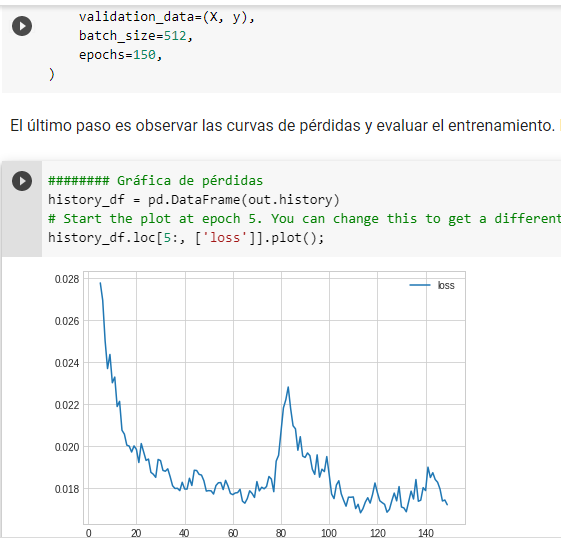


Como puede verse, hay un comportamiento ruidoso que de hecho nos ha llegado a dar un pico de perdidas entorno a la época 85. Si ahora repito el entrenamiento durante 300 épocas, voy a comprobar como el ruido se apodra aún más del entrenasmiento, y voy a tener unas pérdidas que fluctuaran mucho entre épocas.


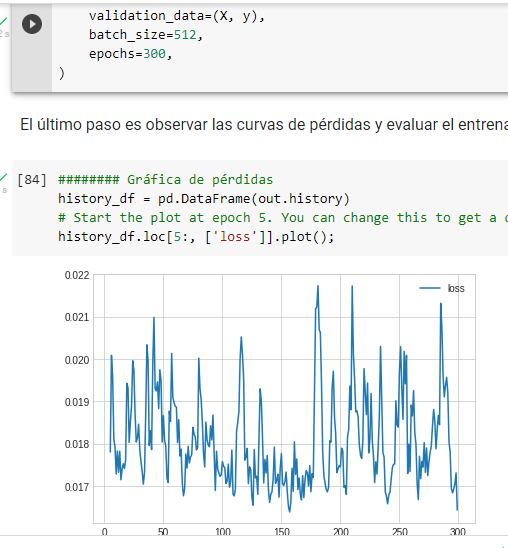

<div class="alert alert-success">
4. Después de realizar el ejercicio 4, ¿Qué efecto tiene cada uno de los hiperparámetros sobre el ajuste de la recta?
</div>

%%%% TO DO %%%%% 

Los hiperparámetros que empleamos para el sobreajuste de la recta són los siguientes:


1.   **Velocidad de aprendizaje:** Es el parámetro encargado de definir los pasos del desplazamiento hechos por el proceso de entrenamiento. Si establecemos este valor como uno muy pequeño, nuestra red necesitará más iteraciones (batches) hasta alcanzar unos errores próximos a los teóricos, si es que los alcanza. Esto se entiende de forma visual, ya que lo que buscamos con cada salto es acercarnos a un valor el cual nos proporciona muy pocas pérdidas. Si establecemos un valor de salto muy grande, corremos el riesgo de dar saltos tan largos que impidan alcanzar valor óptimo. Por lo que tendremos dificultados para alcanzar una convergencia en nuestra solución.

2.   **Tamaño del batch:** Este parámetro define como de grande es el subconjunto de datos empleado por el SGD para el entrenamiento de la red.
Esta particion permite a la red neuronal actualizar los parametros W y b más veces.
Si tenemos grandes cantidades de datos, el costo computacional aumenta y la red neuronal tarda más en ejecutar cada ciclo. Si dividimos las épocas en iteraciones con un valor de batchs pequeño, ya no es necesario cargar todos los datos en la memoria al mismo tiempo y la red neuronal se entrena más rapido.

3. **Numero de muestras:** El número de muestras es el número de datos total que tenemos en la base de datos.
Este valor puede de hecho tener implicaciónes directaas con, por ejemplo, la función de activacióncon. Como de hecho ocurre con la función MAE.









<div class="alert alert-success">
5. A la vista de los resultados de la celda "# Modelo lineal": ¿El modelo está infraajustado, sobreajustado, o es simplemente correcto?
</div>

%%%% TO DO %%%%% 

Para comprobar si tenemos infraajuste o sobreajuste, debemos tener en cuenta qué significa cada cosa.

El infraajuste significa que no hemos proporcionado del suficiente entrenamiento al modelo como para que obtenga unas pérdidas similares a las teóricas. Esto da como consecuencia que la curva de pérdidas teóricas y la de pérdidas obtenidas no convergan en ningún punto, además de que la curva de pérdidas obtenidas siempre decrezca con cada época y tenga valores inferiores a los teóricos.

El sobreajuste es lo contrario, hemos entrenado de más a la red haciendo que sus pérdidas sean de hecho mayores a las teóricas. Siendo un comportamiento que va a más conforme aumentamos de época.
Graficamente esto implica que ambas curvas convergan mas o menos, hasta que llegado un punto la curva de pérdidas obtenida aumente con cada época. Lo cual nos permite definir que cuanto más grande sea la separación entre estas dos curvas, mayor va a ser el sobreajuste del modelo.

En base a estas dos definiciones, podríamos determinar que sufrimos de cierto sobreajuste devido a la pequeña separación entre la curva teórica y la medida durante el entrenamiento.
Sin embargo, tenemos que tener en mente que nunca vamos a poder librarnos del ruido a la hora de entrenar el modelo, por lo que siempre vamos a sufrir en el mejor de los casos un ligero sobreajuste.

La clave del entrenamiento está en estudiar estas gráficas para comprobar cómo de grande es este sobreajuste, y así poder llegar a un compromiso.

En este caso concreto,  muy posiblemente entre en el margen de valores aceptable como para considerar el entrenamiento como uno correcto.



<div class="alert alert-success">
6. A la vista de los resultados de la celda "# Modelo de "alta capacidad"": ¿El modelo está infraajustado, sobreajustado, o es simplemente correcto?
</div>

%%%% TO DO %%%%% 

En la gráfica devuelta tras el entrenamiento, podemos estudiar información clave de nuestro modelo.

En base a las definiciones dadas en la pregunta anterior, gráficamente podemos deducir si tenemos infraajuste o sobreajuste en función de si las curvas se llegan a aproximar mucho, nunca se tocan, o llegados a un punto se separan.

El hecho de que a partir de cierto punto se separen ambas rectas, y las pérdidas aumenten, nos da todas las pistas para saber que sufrimos de sobreajuste.
Al haber ajustado de más nuestro modelo, los erroes cometidos por el mísmo van a ser mucho mayores que los teóricos, y con cada época adiciones vamos a incrementar este error.

En la práctica, debido a  que tenemos ruido, es imposible que un modelo tenga exactamete las mismas pérdidas que las teóricas. Por lo que siempre vamos a tener cierta separación entre la curva teórica y práctica. Sim ebargo, lo que buscamos en un compromiso que reduzca las pérdidas todo lo posible.

En concreto el sobreajuste que sufrimos es intolerable, y deberemos modificar el modelo para que esto deje de ocurrir.

Para mejorar el modelo, una primera acción puede ser modificar el tamaño del batch. Ya que, como hemos explicado antes, un mal valor de este parámetro nos puede producir un entrenamiento infructuoso.

Si modifico el valor del batch a la mitad (256) y establezco el número de épocas a 100, observamos un comportamiento mucho peor:

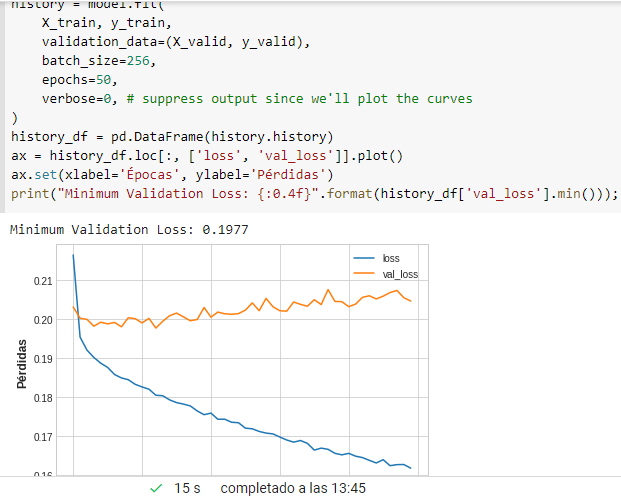

Este resultado era previsible, ya que si reduzco aún más el batch, voy a sufrir más reajustes de los pesos de la neurona con cada época y por tante si mi entrenamiento era malo ahora voy a sufrir aún mas las consecuencias. En base a esto, parece claro que debemos aumentar el tamaño del batch para intentar reducir este sobreajuste, y así comprobar cómo responde el modelo.

Mi segunda idea fué aumentar bastante el batch, hasta 4096. El modelo mejora ligeramente su rendimiento, teniendo algo menos de pérdidas, pero el resultado no llega a ser satisfactorioera del todo, ya que el sobreajuste sigue siendo alto.

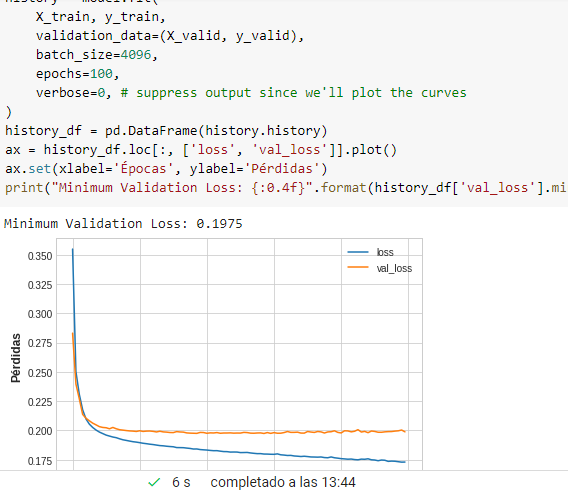

Llegados a este punto, no parece que aumentando más el tamaño del batch lleguemos a un resultado mejor. Por lo que, a falta de conocer otras técnicas para reducir el sobreajuste, quizá era momento de modificar la topología de la red.

Afortunadamente, lo primero que probé fué establecer una capa densa oculta adicional formada por una sola neurona, y colocarla antes de la capa de 128 neuronas.
Este cambio, pese a que en un principio parece poco, da como resultado que la curva de pérdidas se asemeja bastante más a la teórica. Aunque sigamos teniendo cierto sobreajuste, parece ser bastante bajo como para considerarlo más que aceptable.
Como era un resultado aceptable, bajé el batch a 2048, obteniendo la siguiente gráfica:

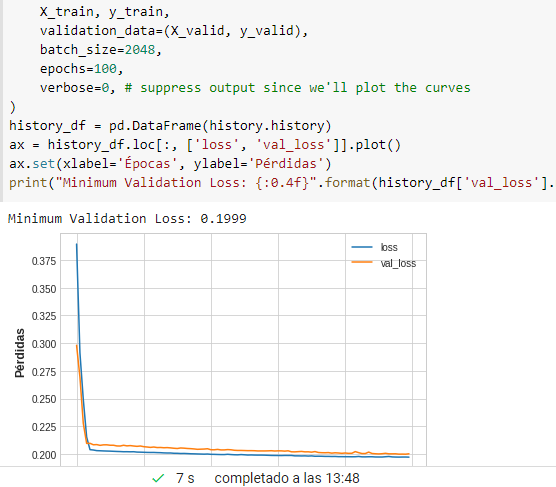

<div class="alert alert-success">
7. A la vista de los resultados de la celda "# Parada temprana": ¿Se ha producido alguna mejora en comparación con el entrenamiento sin parada anticipada?. Pruebe a experimentar con `patience` y `min_delta` para ver qué diferencia puede encontrar?
</div>

%%%% TO DO %%%%% 

La función callback establecida va a detectar si se ha realizado una mejora de 0.001 (valor de min_delta) en 5 (valor patience) epocas. En caso de no darse esta situación, se para el entrenamiento y se queda con el mejor resultado obtenido.

En base a esto, tenemos una mejora a nivel computacional, ya que estamos ahorrando cálculos en el entrenamiento de un modelo que no de resultados.
Pese a que en 5 épocas quizá no tengamos suficientes reajustes en los pesos de las neuronas, el gráfico nos indica que tenemos de hecho un sobreajuste notorio.

Si cambiamos el valor de "patience" a 50, los resultados cambian a los siguientes: 

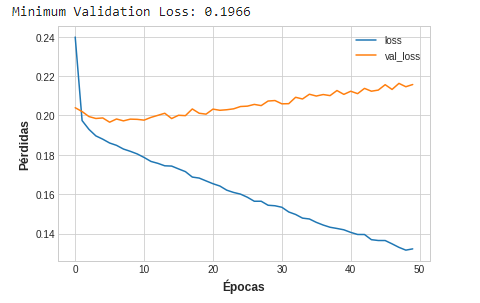

Como podemos ver, el uso de las funciones callback nos permiten ahorrar cómputo gracias a una comprobación preventiva. Sin embargo, no mejoran el modelo mas hayá de quedarse con aquel con mejor rendimiento.


<div class="alert alert-danger">
Pregunta avanzada
    
8. En las dos bases de datos utilizadas en la práctica se ha trabajado con características que no eran numéricas. Para poder procesar este tipo de características se ha realizado una operación de preprocesado. Dentro de la operación de preprocesado se ha definido una estrategia de codificación numérica denominada "OneHotEncoder". Investigue este tipo de codificación y explique su funcionamiento.
</div>

%%%% TO DO %%%%% 

Debido a que las redes neuronales requieren de valores numéricos para trabajar, es necesario tener una "traducción" entre información no numérica a números.

Por ejemplo, si queremos trabajar con bases de datos que emplean tamaños del tipo "dulce, salado, agrio", no tenemos número, sino cadenas de texto.

OneHotEncoder es precisamente un método encargado de transformar nuestras columnas sin dato numérico por uno que si lo sea. De forma que traduzca información como  el "NaturallyAspirated" de nuestra base de datos en una cadena binaria.

Para esto, genera una columna por cada valor que no sea número. Esta columna tendrá un único 1, que representa el valor tratado, y un 0 los demás, que representa que no se tratan dichos valores. Es decir, tendríamos algo como lo siguiente:

| `Categoria 1` | `Categoria 2` | `Categoria 3` | |
|-----------------|--------------|----------------|----------------|
| 1 | 0 | 0 | `Categoria 1` | 
| 0 | 1 | 0 | `Categoria 2` | 
| 0 | 0 | 1| `Categoria 3` |

De esta forma, cuando el modelo haga referencia a la categoría 1, establecerá las categorías 2 y 3 a cero, y así sucesibamente.
 
